In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np
import matplotlib.pyplot as plt

pickle_in = open("../Preprosesing-data/x_y.pickle","rb")
X = pickle.load(pickle_in)

In [2]:
X[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

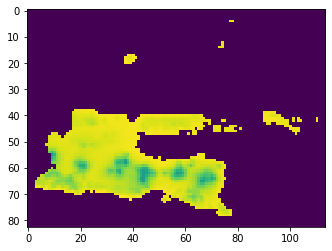

In [3]:
plt.imshow(X[0])

In [4]:
X = np.array(X).reshape(-1,83,114,1,1)

In [5]:
X.shape

(348, 83, 114, 1, 1)

In [6]:
X[0]

array([[[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       ...,


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]]], dtype=float32)

In [7]:
X_train = X[:-12]
X_test = X[-12:]

In [8]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

Using TensorFlow backend.


In [9]:
seq = Sequential()

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None,83, 114,1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3,3),
               activation='relu',
               padding='same', data_format='channels_last'))
seq.compile(loss='mse', optimizer='adam')

In [10]:
seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 83, 114, 40) 59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 83, 114, 40) 160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 83, 114, 40) 115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 83, 114, 40) 160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 83, 114, 40) 115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 83, 114, 40) 160       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, None, 83, 114, 40)

In [11]:
seq.fit(X_train, X_train, batch_size=6,epochs=5, validation_split=0.05)

ValueError: Error when checking input: expected conv_lst_m2d_1_input to have shape (None, 83, 114, 1) but got array with shape (83, 114, 1, 1)

In [16]:
pred_list =[]

batch = X_train[-12:].reshape((-1,83,114,1,1))
batch

array([[[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         ...,

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]]],



       [[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          ...,
          [0.]

In [36]:
prediksi=seq.predict(batch)

prediksi.shape

(12, 1, 83, 114, 1)

In [37]:
prediksi=np.squeeze(prediksi, axis=(3,))

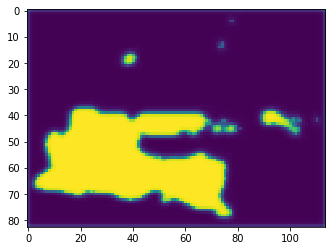

In [41]:
plt.imshow(prediksi[0])

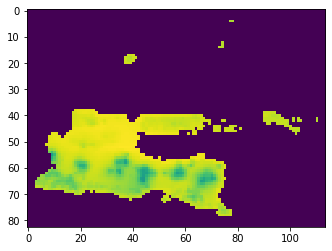

In [44]:
test=np.squeeze(X[-12:], axis=(4,))
plt.imshow(test[0][0])

TypeError: Invalid shape (83, 114, 1) for image data

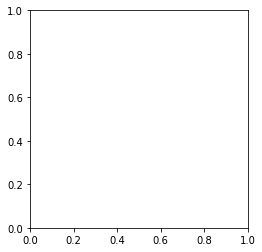

In [18]:
plt.imshow(pred_list[0][0])

In [155]:
X=np.array(X).reshape(-1,1,:,:)
plt.imshow(X[-12][0])

SyntaxError: invalid syntax (<ipython-input-155-db0d9508614d>, line 1)

In [149]:
# batch
batch[:,1:,:,:]

array([], shape=(12, 0, 83, 114), dtype=float32)

In [147]:
for i in range(12):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:,:],[[pred_list[i]]],axis=2)

pred_list

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 5 dimension(s)